# T1 Cosmology

In [1]:
import camb
import numpy as np
import matplotlib.pyplot as plt

print(f"Versión de CAMB: {camb.__version__}")

Versión de CAMB: 1.5.8


## P6 

Using CAMB, plot the evolution of the density parameters for matter, radiation, dark energy and curvature. 

In [3]:
# We define de parameters (considering the estimations of Planck)

H0 = 67.4 # km/s/Mpc
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
ns = 0.965
tau = 0.054

In [4]:
# Defining the set of scale factors that we are going to use
a_s = np.linspace(1, 1e-4, 10_000)

# Creating a function to pass to redshift
def a_to_z(a):
    return 1/a - 1

zs = a_to_z(a_s)

In [5]:
pars = camb.CAMBparams()  
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau)

pars.set_dark_energy(w=-1); 
results = camb.get_results(pars)

In [6]:
# dark energy
Omega_de = results.get_Omega('de', z=zs)

# matter
Omega_cdm = results.get_Omega('cdm', z=zs)
Omega_b = results.get_Omega('baryon', z=zs)
Omega_n = results.get_Omega('neutrino', z=zs)
Omega_mn = results.get_Omega('nu', z=zs)

Omega_m = Omega_cdm + Omega_b + Omega_n + Omega_mn # the matter density is the sum over all the contributions

# radiation
Omega_r = results.get_Omega('photon', z=zs)

# curvature
Omega_K = results.get_Omega('K', z=zs)

# total
Omega_tot = Omega_de + Omega_m + Omega_r + Omega_K # this must be equal to 1
print(Omega_tot)

[1. 1. 1. ... 1. 1. 1.]


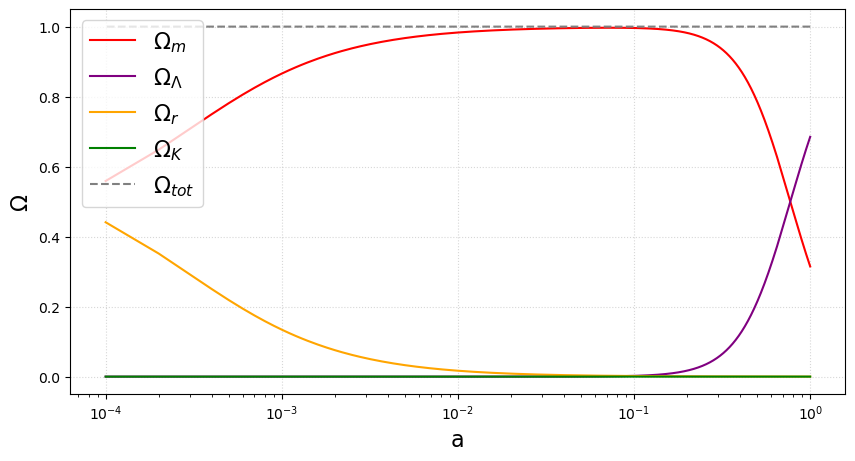

In [7]:
plt.figure(figsize=(10, 5))
plt.semilogx(a_s, Omega_m, color='red', label=r'$\Omega_m$')
plt.semilogx(a_s, Omega_de, color='purple', label=r'$\Omega_{\Lambda}$')
plt.semilogx(a_s, Omega_r, color='orange', label=r'$\Omega_r$')
plt.semilogx(a_s, Omega_K, color='green', label=r'$\Omega_K$')
plt.semilogx(a_s, Omega_tot, color='grey', ls='--', label=r'$\Omega_{tot}$')

plt.xlabel('a', fontsize=16)
plt.ylabel(r'$\Omega$', fontsize=16)
plt.grid(alpha=0.5, ls=':')
plt.legend(fontsize=16, loc='upper left')
plt.show()

## P7)

The distance duality relation gives

$$D_L(z) = (1+z)^2 D_A(z)$$

where $D_L(z)$ and $D_A(z)$ are the luminosity distance and angular diameter distance, respectively, as a function of the redshift $z$. Using python, plot the lines of constant $f_K(\Chi)$ in the plane $\Omega_{m,0} - \Omega_{\Lambda,0}$ where:

1. $\Omega_{k,0}>0: $

$$
f_K(\Chi) = \frac{c}{H_0 \sqrt{\Omega_{k,0}}}sinh\left( \sqrt{\Omega_{K,0}} \int_0^z \frac{dx}{E(x)} \right)
$$

2. $\Omega_{k,0} = 0: $

$$
f_K(\Chi) = \frac{c}{H_0} \int_0^z \frac{dx}{E(x)} 
$$

3. $\Omega_{k,0}<0: $

$$
f_K(\Chi) = \frac{c}{H_0 \sqrt{-\Omega_{k,0}}}sin\left( \sqrt{-\Omega_{K,0}} \int_0^z \frac{dx}{E(x)} \right)
$$


In [48]:
import scipy.integrate as integrate
from astropy.cosmology import Planck18 as cosmo
import astropy.constants as const
import astropy.units as u

H_0 = (cosmo.H0).value
c = ((const.c).to(u.km/u.s)).value

def E(z, omega_m, omega_DE, omega_r = 0, w = -1):
    omega_k = 1 -omega_m - omega_DE - omega_r

    r = omega_r * (1 + z) ** 4
    m = omega_m * (1 + z) ** 3
    de = omega_DE * (1 + z) ** (3 * (1 + w))
    curv = omega_k * (1 + z) ** 2

    return np.sqrt(r + m + de + curv)

def f_k(z, omega_m, omega_DE, omega_r=0, w=-1):

    def E_inv(x):
        return 1 / E(x, omega_m, omega_DE, omega_r, w=w)

    Chi = integrate.quad(E_inv, 0, z, full_output=1)[0] 

    omega_k = 1 - omega_m - omega_DE - omega_r

    if omega_k > 0:
        arg = np.sqrt(omega_k) * Chi
        return ((c/100) * np.sinh(arg)) / np.sqrt(omega_k)
    
    elif omega_k < 0:
        arg = np.sqrt(-omega_k) * Chi
        return ((c/100) * np.sin(arg)) / np.sqrt(-omega_k)

    elif int(omega_k) == 0:
        return (c/100) * Chi

In [65]:
# Create a grid for Omega_m and Omega_Lambda

omega_m_values = np.linspace(0,3, 100)
omega_lambda_values = np.linspace(0,5,100)
Z = 1

# Prepare a meshgrid
Omega_m, Omega_lambda = np.meshgrid(omega_m_values, omega_lambda_values)
print(Omega_m)
print(Omega_lambda)

# Calculate f_k for the grid
fk_values = np.zeros_like(Omega_m)
for i in range(len(omega_m_values)):
    for j in range(len(omega_lambda_values)):
        fk_values[i, j] = f_k(Z, Omega_m[i, j], Omega_lambda[i, j])

[[0.         0.03030303 0.06060606 ... 2.93939394 2.96969697 3.        ]
 [0.         0.03030303 0.06060606 ... 2.93939394 2.96969697 3.        ]
 [0.         0.03030303 0.06060606 ... 2.93939394 2.96969697 3.        ]
 ...
 [0.         0.03030303 0.06060606 ... 2.93939394 2.96969697 3.        ]
 [0.         0.03030303 0.06060606 ... 2.93939394 2.96969697 3.        ]
 [0.         0.03030303 0.06060606 ... 2.93939394 2.96969697 3.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.05050505 0.05050505 0.05050505 ... 0.05050505 0.05050505 0.05050505]
 [0.1010101  0.1010101  0.1010101  ... 0.1010101  0.1010101  0.1010101 ]
 ...
 [4.8989899  4.8989899  4.8989899  ... 4.8989899  4.8989899  4.8989899 ]
 [4.94949495 4.94949495 4.94949495 ... 4.94949495 4.94949495 4.94949495]
 [5.         5.         5.         ... 5.         5.         5.        ]]


C:\Users\MICROSOSFT\AppData\Local\Temp\ipykernel_18388\1291032198.py:17: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(r + m + de + curv)
C:\Users\MICROSOSFT\AppData\Local\Temp\ipykernel_18388\1291032198.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 / E(x, omega_m, omega_DE, omega_r, w=w)


In [66]:
fk_values

array([[2248.443435  , 2226.11136192, 2204.50892545, ..., 1340.90639114,
        1336.63759429, 1332.41092444],
       [2270.14857944, 2246.95304795, 2224.54037213, ..., 1343.36231023,
        1339.05806743, 1334.79664119],
       [2292.7212969 , 2268.59796058, 2245.31666004, ..., 1345.81368506,
        1341.47368075, 1337.17719553],
       ...,
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan]])

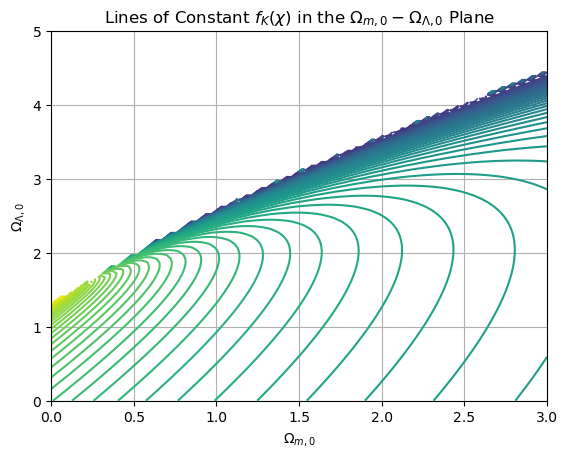

In [67]:
plt.contour(Omega_m, Omega_lambda, fk_values, 100)
plt.title('Lines of Constant $f_K(\\chi)$ in the $\\Omega_{m,0} - \\Omega_{\\Lambda,0}$ Plane')
plt.xlabel('$\\Omega_{m,0}$')
plt.ylabel('$\\Omega_{\\Lambda,0}$')
plt.grid()
plt.show()

_____________________________________________